# Revolving door Data Challenge

# Goal
You belong to the people analytics team for a food conglomerate. Employee turnover has been rampant for your 10 subsidiaries. The CFO estimates that the cost of replacing an employee is often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
Your team has been tasked with diagnosing why and when employees from your subsidiaries leave. You need a tangible data-driven recommendation for each of the ten Presidents of your subsidiaries. What are your recommendations and why?

#### Data
- "employee_retention" - comprehensive information about employees. Columns:
- employee_id : id of the employee. Unique by employee per company
- company_id : company id.
- dept : employee department
- seniority : number of yrs of work experience when hired
- salary: average yearly salary of the employee during her tenure within the company
- join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13
- quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)


## Insights and Recommendations


### Questions

Based on the information we have about the employees there are some obvious questions that can be asked about the reason behind this employee turnover.

- Is it money related?
- Is it a specific department?
- Is it a specific subsidiary?
- Is there a relationship between employees' years of experience and their tenure at company?
- Is this a problem with a specific cohort?
- can we predict the employees’ tenure with company using these features?


### Findings 

- Tenure

Most quits happens after 1 year, there is a second wave of people leaving after 2 years with the company.

The reason for this wave of quits after 1 year could be lack of promotion or salary increase, also for many companies if employee wants to leave before their 1 year anniversary they would probably have to give back their sign-on bonuses and they will not get any stocks, so most people stay for at least 12 month even if they do not like the company, their management or their job.

Most of current employees are very new and if the company does not make any changes in their culture, management, and promotion policies they would probably leave as well.

- Salary

there is no linear relationship (or a very weak linear relationship) between salary and tenure of an employee in different departments.

- Department

Employees in Engineering and Data Science departments have the highest salaries and the longest Tenures with the company (even though salaries in these two departments are much higher than the other departments, in average they stay about only 2 month more than employees is other departments), so maybe the salaries that company pays in other departments are not competitive salaries.

- Company

subsidiaries 1 and 2 have the highest salaries (in average and also for each department) and the highest average tenures.

- Seniority

There is no meaningful difference between average tenure for employees with different seniority levels, company loses both junior and senior hires.

- Join Date

for people who joined the company at the same time, the average salary of people who quit is less than the average salary of the people who stayed. Since we don't have information about promotions or salary over time (we have only the average salary of an employee over their tenure) we can assume that people who stayed are people who got promoted hence they have higher average salary.

- Quits

Employees started to quit around 2012, and the number of people quitting increased through the years, in some months in 2014 and 2015 the number of new hires was less than the number of people who quitted that month. company's growth plateaued around the end of 2014.


- Predicting Tenure

Using features provided by the dataset and some engineered features I was not able to train a model that could classify the tenure of the employees successfully, this indicates that there are other hidden reasons that contribute to this employee turnover. 

### Recommendations

<b>It seems that employee turnover in this company is a symptom of deeper issues which goes beyond any department or subsidiary or level and those issues have not been resolved. The list of possible reasons may include low employee morale, lack of a clear career path, lack of recognition and promotion or poor management. 
Dissatisfaction with job and low commitment to the organization can also cause an employee to withdraw and begin looking for other opportunities. 
Salary does not always play a large role in employee turnover as we see employees with higher salaries quit as well.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Data

In [2]:
df = pd.read_excel('data/employee_retention.xlsx', index_col=0)
print('\033[1m' +'Number of records:', df.shape[0])
print('\033[1m' +'Features: ', df.columns.tolist())
df.head()

Number of records: 34702
Features:  ['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date', 'quit_date']


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444,8,temp_contractor,0,5850.0,2008-01-26 00:00:00,2008-04-25
1,388804,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990,3,design,9,90000.0,2012-03-26 00:00:00,2015-04-10
3,120657,2,engineer,20,298000.0,2013-04-08 00:00:00,2015-01-30
4,1006393,1,temp_contractor,0,8509.0,2008-07-20 00:00:00,2008-10-18


In [3]:
print('\033[1m' +'Number of all empolyees:' ,df['employee_id'].nunique())

Number of all empolyees: 34702


In [4]:
print('\033[1m' +'Number of companies: ', df['company_id'].nunique())
print('\033[1m' +'Company ID List:',np.sort(df['company_id'].unique()))

Number of companies:  12
Company ID List: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [5]:
print('\033[1m' +'Departments: ', df['dept'].unique())

Departments:  ['temp_contractor' 'design' 'engineer' 'marketing' 'customer_service'
 'data_science' 'sales']


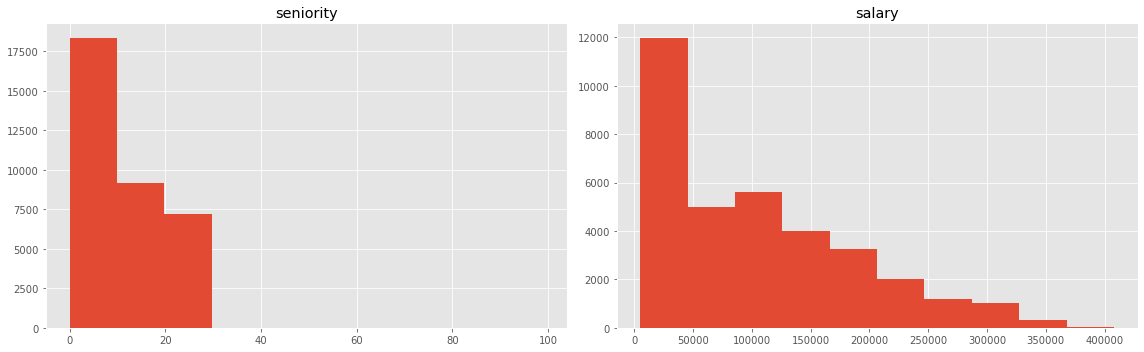

In [6]:
df[['seniority', 'salary']].hist(figsize=(16,5))
plt.tight_layout()


In [7]:
#removing outliers for seniority
df = df[df['seniority']<=30]
# investigating null values
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary           239
join_date          0
quit_date      11192
dtype: int64

In [8]:
df_nosalary= df[df.salary.isnull()]
df_nosalary.head(20)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
16,488083,1,engineer,8,NaN,2011-06-13 00:00:00,2013-06-07
41,259298,1,engineer,9,NaN,11.07.2011,2015-10-16
194,699687,3,customer_service,3,NaN,2014-10-13 00:00:00,NaT
245,210853,7,customer_service,4,NaN,2012-09-10 00:00:00,2013-10-04
310,63729,1,marketing,5,NaN,2012-03-19 00:00:00,2013-05-31
1014,274020,4,customer_service,4,NaN,2014-04-21 00:00:00,NaT
1017,645473,1,data_science,19,NaN,2014-08-18 00:00:00,NaT
1287,323769,1,sales,6,NaN,2015-01-12 00:00:00,NaT
1415,22477,2,sales,6,NaN,2014-12-22 00:00:00,NaT
1469,859885,9,customer_service,16,NaN,10.07.2013,NaT


<b>It seems like there are missing salaries across diffrenet companies, different departments and different seniority levels, both among current and ex employees, since this seems to be random and the number of records with misssing values is less than 1 % of data, I would just drop these records.  

In [9]:
# dropping records with no salary
df = df.dropna(subset=['salary'])
df.shape

(34461, 7)

In [10]:
df = df.fillna(0)
df['current_employee'] = df['quit_date'].apply(lambda x: 1 if x==0 else 0)
df.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,current_employee
0,1001444,8,temp_contractor,0,5850.0,2008-01-26 00:00:00,2008-04-25 00:00:00,0
1,388804,8,design,21,191000.0,05.17.2011,2012-03-16 00:00:00,0
2,407990,3,design,9,90000.0,2012-03-26 00:00:00,2015-04-10 00:00:00,0
3,120657,2,engineer,20,298000.0,2013-04-08 00:00:00,2015-01-30 00:00:00,0
4,1006393,1,temp_contractor,0,8509.0,2008-07-20 00:00:00,2008-10-18 00:00:00,0
5,287530,5,marketing,20,180000.0,2014-06-30 00:00:00,0,1
6,561043,3,customer_service,18,119000.0,2012-07-02 00:00:00,2014-03-28 00:00:00,0
7,702479,7,data_science,7,140000.0,12.27.2011,2013-08-30 00:00:00,0
8,545690,10,data_science,16,238000.0,12.23.2013,0,1
9,622587,5,sales,28,166000.0,2015-07-01 00:00:00,0,1


In [11]:
print('\033[1m' +'Number of current employees : ', df['current_employee'].sum())

Number of current employees :  11084


## Reformating join date and quit date

<b>Looking at data shows that different formats were used to recorde the join date and the quit date of employees, in this step I changed different formats to date format.

In [12]:
df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')
df['quit_date'] = pd.to_datetime(df['quit_date'], errors='coerce')
df = df.fillna(0)
df['last_date']= df['quit_date'].apply(lambda x: x if x != 0 else datetime(2015,12,15).date())
df['tenure_months']= round((df['last_date']- df['join_date'])/np.timedelta64(1, 'M'),0)
df['last_date'] = pd.to_datetime(df['last_date'], errors='coerce')
df['join']=df['join_date'].apply(lambda x: x.year *100 + x.month)

df_ex = df.copy()
df_ex = df_ex[df_ex['current_employee']==0]
df_ex['quit_date'] = pd.to_datetime(df_ex['quit_date'], errors = 'coerce')

In [13]:
df[df['dept']== 'temp_contractor'].groupby('company_id')['employee_id'].count()

company_id
1     1015
2      998
3     1024
4     1004
5      994
6      967
7      961
8      979
9     1044
10    1014
Name: employee_id, dtype: int64

In [14]:
print ('\033[1m'+'diffrent tenures for contractors: ' , ''.join(map(str,df[df['dept']== 'temp_contractor'].tenure_months.unique().tolist())),'months')

diffrent tenures for contractors:  3.0 months


In [15]:
print('\033[1m'+'Number of total currect temp contractors in all companies:',df[(df['dept']== 'temp_contractor')& df['current_employee'] == 1].shape[0])

Number of total currect temp contractors in all companies: 0


In [16]:
print('\033[1m'+'Last day of work for any temp contractors:', df[df['dept']=='temp_contractor']['last_date'].max())

Last day of work for any temp contractors: 2011-03-28 00:00:00


In [17]:
print('\033[1m'+'Average work experience of temp contractors:',df[df['dept']=='temp_contractor']['seniority'].mean(), 'years')

Average work experience of temp contractors: 0.0 years


<b>There is a department named 'temp_contractor'. All people who were hired as temp contractor worked for 3 month, they were people with zero experience and though each company had used about a 1000 contractors in the past, right now none of the companies have any temporary contractors, in fact none of the companies used temp contractors since march 2011. Therefore, there was a change in policy for hiring interns or temp contractors. since we are investigating the reason for high employee turnover we can just ignore these temp contractors.

In [18]:
#removing temp contractors
df = df[df['dept'] != 'temp_contractor']
df_ex = df_ex[df_ex['dept'] != 'temp_contractor']


In [19]:
print(df.join_date.min())

2011-01-24 00:00:00


<b> the earliest join date for  employees in this data base is 24 Jan 2011. So either data is incomplete and we don't have information about full time employees who joined company before 2011, or before 2011 there were just temporary contractor employees and first full-time employees joined in 2011. Either way we have the data for people who joined in 2011 and after.

In [20]:
print('Average Employee Tenure (months) for all employees:')
print('Max: '+str(df['tenure_months'].max()))
print('Mean: '+str(df['tenure_months'].mean()))

Average Employee Tenure (months) for all employees:
Max: 58.0
Mean: 18.90127141163485


## Exploratory data analysis on current and ex employees

## Tenure

Employee Tenure with company(months)
more than 50 percent of ex employees left the company in  14.0  months or less


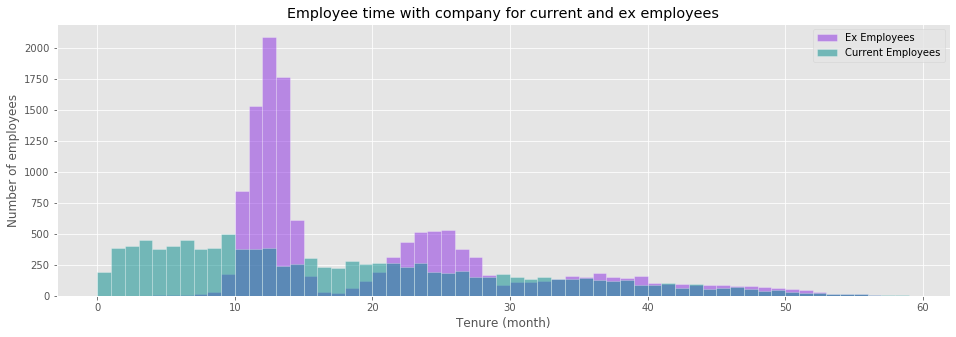

In [21]:
# plotting the tenure of ex employees
print('\033[1m'+'Employee Tenure with company(months)')
print ('more than 50 percent of ex employees left the company in ',df[(df['current_employee']==0)].tenure_months.median(), ' months or less')
fig = plt.subplots(figsize = (16,5))
bins1 = [x for x in range(60)]
plt.hist(df[(df['current_employee']==0)].tenure_months, bins=bins1,ec='white', color='blueviolet',alpha=0.5,label='Ex Employees');
plt.hist(df[(df['current_employee']==1)].tenure_months, bins=bins1,ec='white', color='darkcyan',alpha=0.5,label='Current Employees');
plt.xlabel('Tenure (month)');
plt.ylabel('Number of employees')
plt.title('Employee time with company for current and ex employees')
plt.legend()
plt.grid(True)

<b>Three modes can be observed, most employee turnover happens after 1 year, there is a second wave of people leaving after 2 years and there is another peak after 3 years, even though it is much smaller than the other peaks.
   
The reason for this wave of quits after 1 year could be lack of promotion or salary increase, also for many companies if employee wants to leave before their 1 year anniversary they would probably have to give back their sign-on bonuses and they will not get any stocks, so most people stay for at least 12 month even if they do not like the company, their management or their job.
   
   
        
The plot also shows that most current employees are very new. the histogram below shows the join date of current and ex employees.

## company

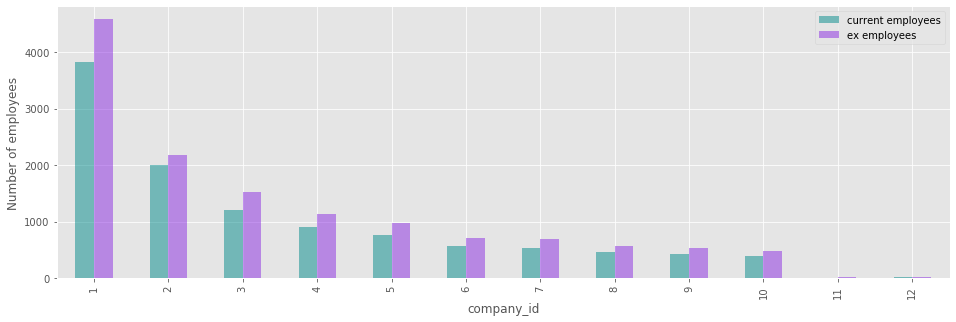

In [22]:
df1= pd.DataFrame({ 'ex employees':df[(df['current_employee']==0)].groupby(['company_id']).employee_id.count(),
                   'current employees':df[(df['current_employee']==1)].groupby(['company_id']).employee_id.count()})

df1[['current employees','ex employees']]\
.plot.bar(figsize = (16,5),alpha=0.5,color={'current employees': "darkcyan", "ex employees": "blueviolet"});
plt.xlabel('company_id')
plt.ylabel('Number of employees')
plt.legend()
plt.show()

In [23]:
df2 = pd.DataFrame({ 'percent who quit':df1['ex employees']/ (df1['ex employees']+df1['current employees'])})
df2.T

company_id,1,2,3,4,5,6,7,8,9,10,11,12
percent who quit,0.544903,0.52177,0.557636,0.559256,0.56092,0.55094,0.56493,0.550388,0.549266,0.554779,0.75,0.521739


<b> companies 1 and 2 have the most employees and companies 11 and 12 have very few employees. 

## Department

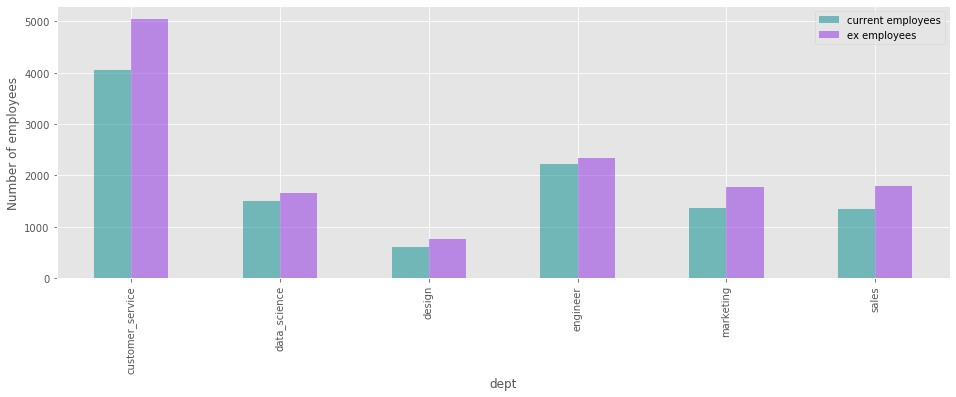

In [24]:
df1= pd.DataFrame({'all employees' : df.groupby('dept').employee_id.count(), 
                   'ex employees':df[(df['current_employee']==0)].groupby(['dept']).employee_id.count(),
                   'current employees':df[(df['current_employee']==1)].groupby(['dept']).employee_id.count()})

df1[['current employees','ex employees']]\
.plot.bar(figsize = (16,5),alpha=0.5,color={'current employees': "darkcyan", "ex employees": "blueviolet"});
plt.xlabel('dept')
plt.ylabel('Number of employees')
plt.legend()
plt.show()

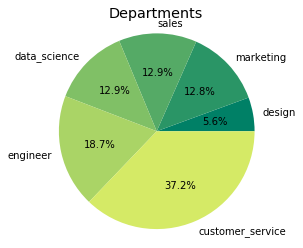

In [25]:
#Pie chart to visualize departments 
deptlist = list(df.dept.unique())
fig, ax = plt.subplots(figsize=(5,4))
theme = plt.get_cmap('summer')
ax.set_prop_cycle("color", [theme(1. * i / len(deptlist))for i in range(len(deptlist))])
ax.pie(df['dept'].value_counts().sort_values(), labels=df['dept'].value_counts().sort_values().index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Departments')
plt.show()

In [26]:
df2 = pd.DataFrame({ 'percent quit':df1['ex employees']/ (df1['ex employees']+df1['current employees'])})
df2.T

dept,customer_service,data_science,design,engineer,marketing,sales
percent quit,0.554847,0.526766,0.563277,0.511821,0.563538,0.571156


<b> Most employees are working in customer service, followed by people in engineering department. Design department has the fewest number of employees. sales , marketing , design and customer service have the highest turnover.
    

## Join Date

In [27]:
import datetime
from matplotlib.dates import date2num
custombins = []
for y in range (2011,2016):
    for m in range(1,13):
        custombins.append(date2num(datetime.date(y,m,1)))
        
custombins.append(date2num(datetime.date(2016,1,1)))    

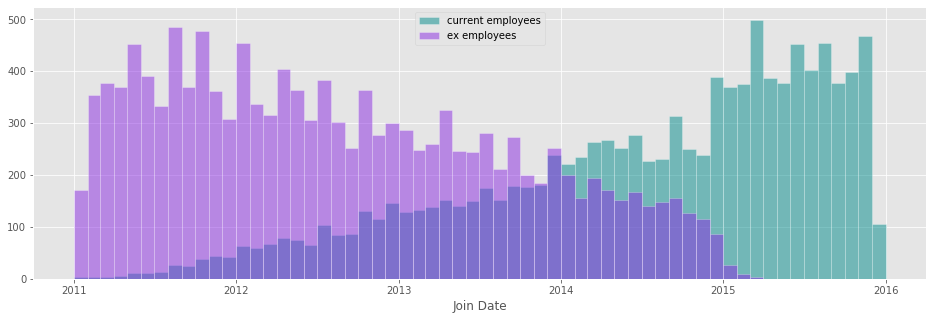

In [28]:
# plotting the tenure of ex employees
fig = plt.subplots(figsize = (16,5))
plt.hist(df[df['current_employee']==1].join_date, bins =custombins,ec='white',  color = 'darkcyan' ,alpha=0.5,label='current employees' )
plt.hist(df[df['current_employee']==0].join_date,bins =custombins,ec='white',  color = 'blueviolet' ,alpha=0.5, label='ex employees');
plt.xlabel('Join Date')
plt.legend()
plt.grid(True)

### Looking at the number of new hires and new quits for each month 

new hires and quits for each month


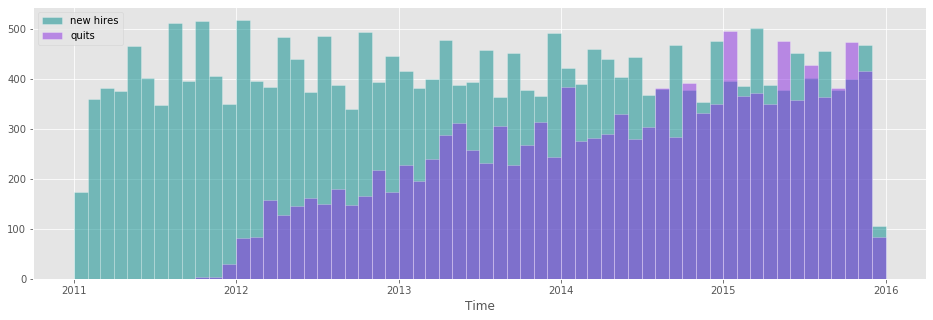

In [29]:
# plotting the tenure of ex employees
print('\033[1m'+'new hires and quits for each month')
fig = plt.subplots(figsize = (16,5))
plt.hist(df.join_date, bins =custombins,ec='white',  color = 'darkcyan' ,alpha=0.5,label='new hires' )
plt.hist(df[df['current_employee']==0].quit_date,bins =custombins,ec='white',  color = 'blueviolet' ,alpha=0.5, label='quits');
plt.xlabel('Time')
plt.legend()
plt.grid(True)

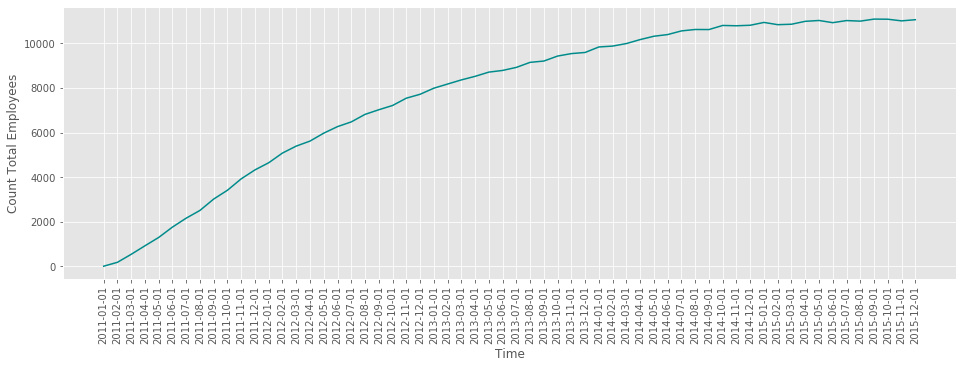

In [30]:
bins = []
for y in range (2011,2016):
    for m in range(1,13):
        if m < 10:
            s= str(y)+'-0'+str(m)+'-01'
        else:
            s= str(y)+'-'+str(m)+'-01'
        bins.append(s)
total_employees = []
for i in range(len(bins)):
    total_hires = df[df.join_date<bins[i]].employee_id.count() 
    total_quits = df_ex[df_ex['quit_date']<bins[i]].employee_id.count()
    total_employees.append( total_hires- total_quits)
fig = plt.subplots(figsize = (16,5));
plt.plot(bins,total_employees, color='darkcyan');
plt.xticks(rotation=90);
plt.xlabel('Time'),
plt.ylabel('Count Total Employees');
plt.show()

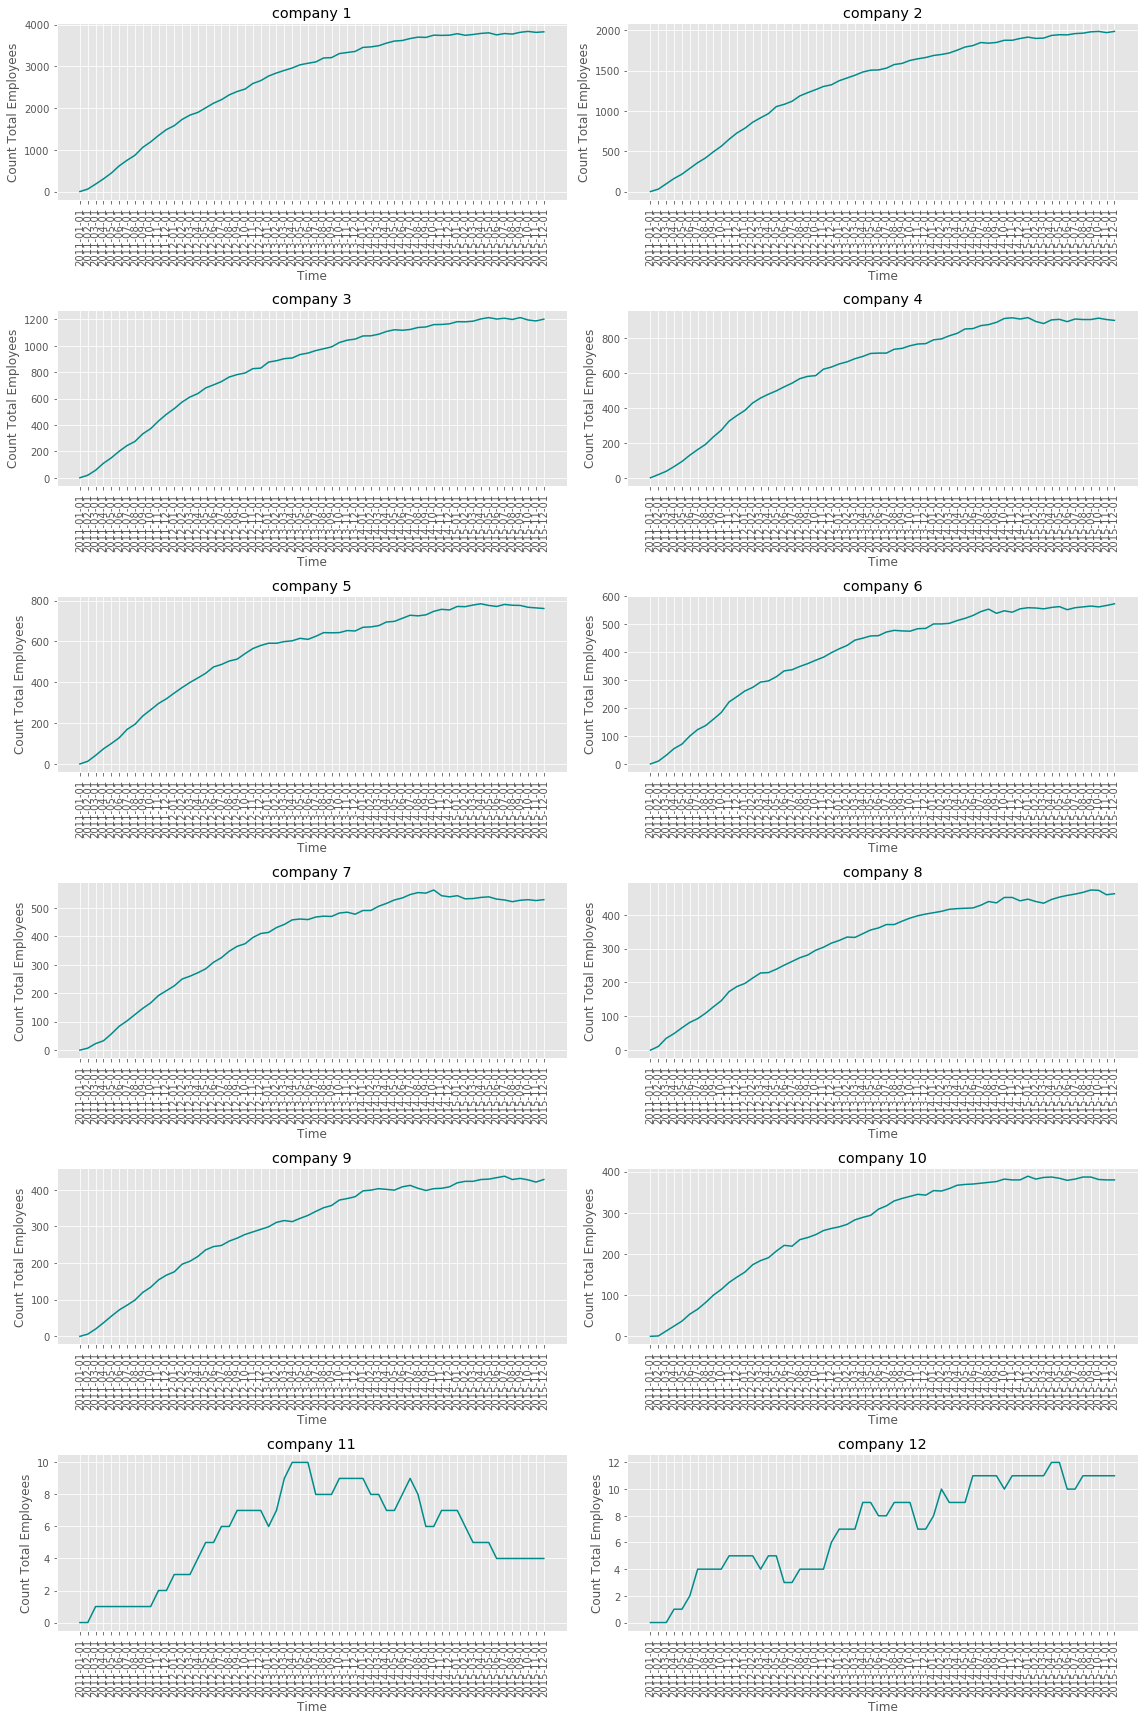

In [31]:
bins = []
for y in range (2011,2016):
    for m in range(1,13):
        if m < 10:
            s= str(y)+'-0'+str(m)+'-01'
        else:
            s= str(y)+'-'+str(m)+'-01'
        bins.append(s)

fig,axs = plt.subplots(6,2,figsize = (16,24));
for j in range(1,13):
    total_employees = []
    for i in range(len(bins)):
        total_hires = df[(df['company_id']==j) & (df.join_date<bins[i])].employee_id.count() 
        total_quits = df_ex[(df_ex['quit_date']<bins[i]) & (df_ex['company_id']==j)].employee_id.count()
        total_employees.append( total_hires- total_quits)
    r= int((j-1)/2)
    c= (j-1)%2
    axs[r,c].plot(bins,total_employees, color='darkcyan');
    axs[r,c].tick_params('x',labelrotation=90)
    axs[r,c].set_xlabel('Time'),
    axs[r,c].set_ylabel('Count Total Employees');
    axs[r,c].set_title('company '+str(j))
plt.tight_layout()
plt.show()


<b> In the first few months subsidiaries were hiring and no one was quitting, the hiring patterns and numbers stayed almost the same for the past four years, but employees started to quit around 2012, and the number of people quitting increased through the years, in some months in 2014 and 2015 the number of new hires was less than the number of people who quitted that month.
    company's growth plateaued around the end of 2014. subsidiary 11 actualy got smaller over the past two years and now has only 4 employees.

## Seniority


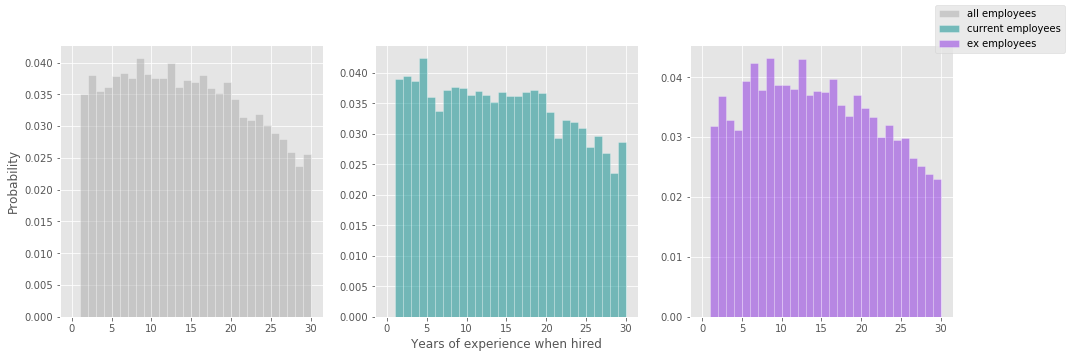

In [32]:
# plotting the years of work experience of ex employees when hired
fig,axs = plt.subplots(1,3,figsize = (16,5))

axs[0].hist(df.seniority, bins=[x for x in range(31)],ec='white', alpha=0.5, color = 'darkgray', density=True, label= 'all employees');
axs[0].set_ylabel('Probability');

axs[1].hist(df[(df['current_employee']==1)].seniority, bins=[x for x in range(31)],ec='white', alpha=0.5, color = 'darkcyan', density=True, label='current employees');
axs[1].set_xlabel('Years of experience when hired');

axs[2].hist(df[(df['current_employee']==0)].seniority, bins=[x for x in range(31)],ec='white', alpha=0.5, color = 'blueviolet', density=True, label='ex employees');

fig.legend();


<b> These plots show the distributions of seniority level of employees for all employees who were hired by this company (in gray) and for current and ex-employees (in green and purple). There is not a meaningful difference between these distributions, the company lost people with all seniority levels almost equally except maybe junior people with years of experience less than 5 years and very senior people with more than 25 years of experience have a slightly smaller probability of quitting.

## Salary

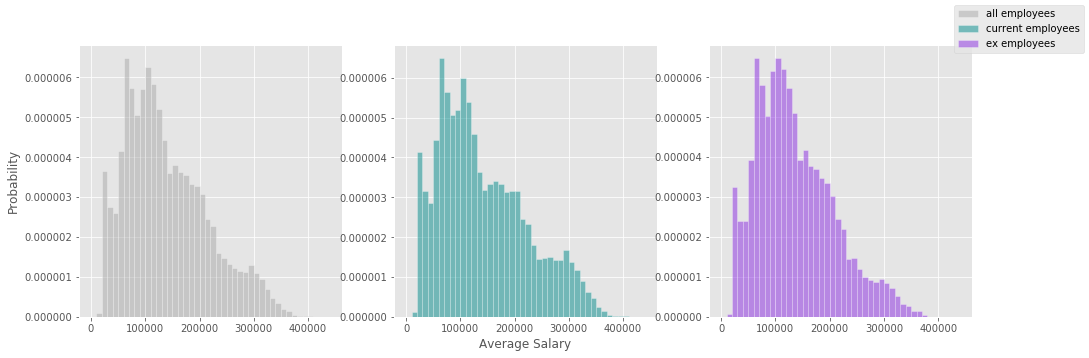

In [33]:
# plotting the salaries of current and ex employees

fig,axs = plt.subplots(1,3,figsize = (16,5))

axs[0].hist(df.salary, bins=[10000*x for x in range(45)],ec='white', alpha=0.5, color = 'darkgray', density=True, label= 'all employees');
axs[0].set_ylabel('Probability');

axs[1].hist(df[(df['current_employee']==1)].salary, bins=[10000*x for x in range(45)],ec='white', alpha=0.5, color = 'darkcyan', density=True, label='current employees');
axs[1].set_xlabel('Average Salary');

axs[2].hist(df[(df['current_employee']==0)].salary, bins=[10000*x for x in range(45)],ec='white', alpha=0.5, color = 'blueviolet', density=True, label='ex employees');



fig.legend();

## Tenure vs Seniority

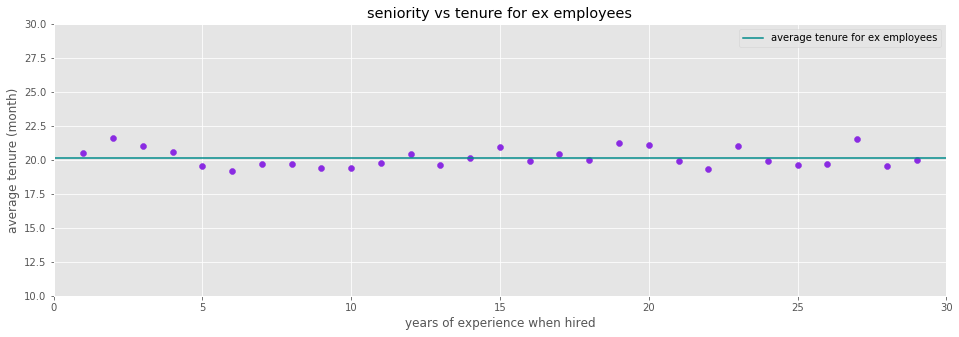

In [34]:
df1= pd.DataFrame({ 'mean_tenure':df[(df['current_employee']==0)].groupby(['seniority']).tenure_months.mean()}).reset_index()
fig = plt.subplots(figsize = (16,5))
plt.scatter(df1.seniority, df1.mean_tenure,color='blueviolet')
y = df[(df['current_employee']==0)].tenure_months.mean() 
plt.plot([0,30],[y,y], label='average tenure for ex employees', color='darkcyan')
plt.xlabel('years of experience when hired')
plt.ylabel('average tenure (month)')
plt.xlim(0,30)
plt.ylim(10,30)
plt.legend()
plt.title('seniority vs tenure for ex employees')
plt.show()

<b>There is no meaningful difference between average tenure for employees with different seniority levels 

## Tenure vs Salary

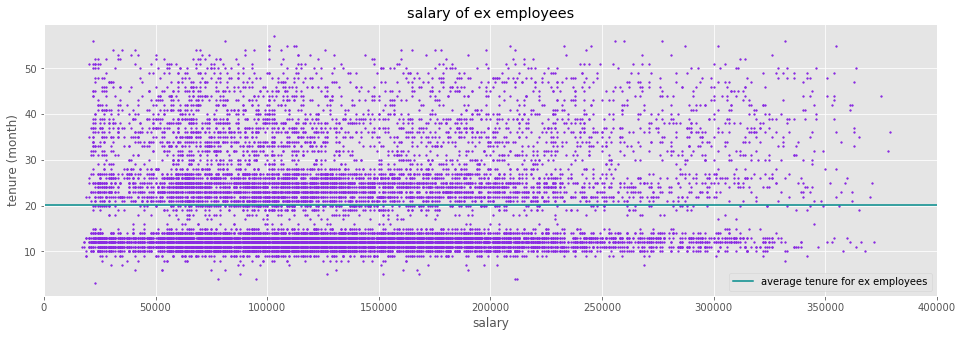

In [35]:
df1= df[(df['current_employee']==0)]
fig = plt.subplots(figsize = (16,5))
plt.scatter(df1.salary, df1.tenure_months,color='blueviolet',s=3)
y = df[(df['current_employee']==0)].tenure_months.mean() 
plt.plot([0,450000],[y,y], label='average tenure for ex employees', color='darkcyan')
plt.xlabel('salary')
plt.ylabel('tenure (month)')
plt.xlim(0,400000)
plt.legend()
plt.title('salary of ex employees')
plt.show()



<b> you can see the cluster of employees leaving after one year or two years in this scatter plot again

In [36]:
def salary_range_function(x):
    if x<50000:
        s = '00k-50k'
    elif x < 100000:
        s = '050k-100k'
    elif x < 150000:
        s = '100k-150k'
    elif x < 200000:
        s = '150k-200k'
    elif x < 250000:
        s = '200k-250k'
    elif x < 300000:
        s = '250-300k'
    elif x < 350000:
        s = '300-350k'
    else:
        s = '>350k'
    return s
df['salary_range']  = df['salary'].apply(lambda x : salary_range_function(x))


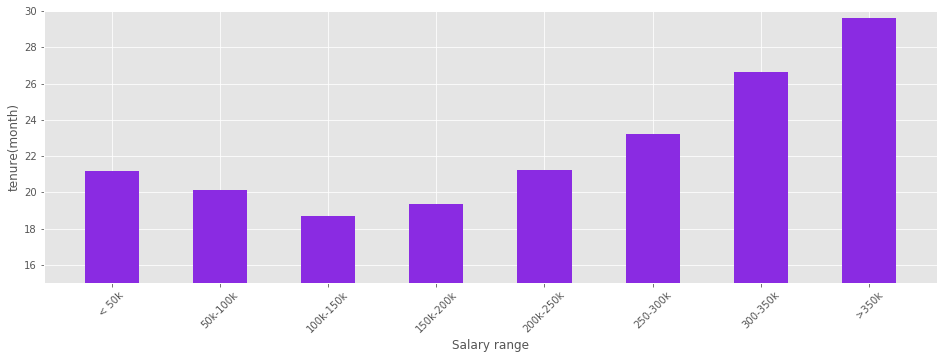

In [37]:
df1= pd.DataFrame({ 'mean_tenure':df[(df['current_employee']==0)].groupby(['salary_range']).tenure_months.mean()}).reset_index()
fig = plt.subplots(figsize = (16,5))
plt.bar(df1.salary_range, df1.mean_tenure, color = 'blueviolet', width=0.5)
plt.xlabel('Salary range')
plt.ylabel('tenure(month)')
plt.xticks(range(8),['< 50k','50k-100k','100k-150k','150k-200k','200k-250k','250-300k','300-350k','>350k'], rotation = 45)
plt.ylim(15,30)
plt.show()

In [38]:
df[(df['current_employee']==0)].groupby(['salary_range']).employee_id.count()

salary_range
00k-50k      1086
050k-100k    3662
100k-150k    3669
150k-200k    2475
200k-250k    1418
250-300k      660
300-350k      362
>350k          45
Name: employee_id, dtype: int64

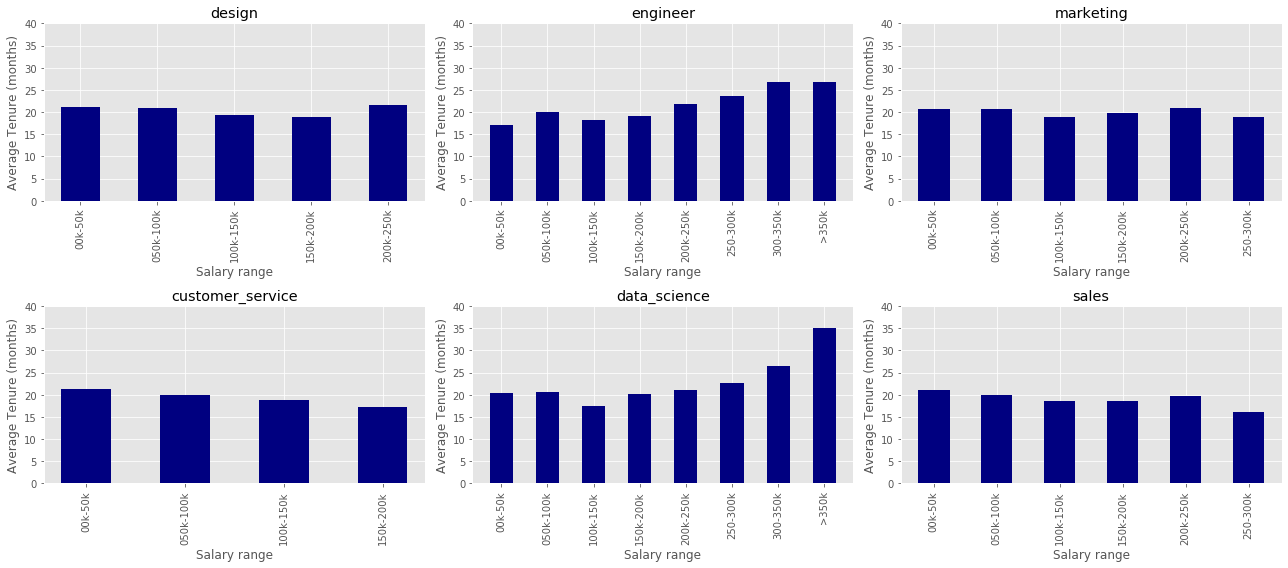

In [39]:
fig, axs = plt.subplots(2,3,figsize=(18,8))
for i in range(len(deptlist)):
    df1= pd.DataFrame({ 'mean_tenure':df[(df['current_employee']==0) & (df['dept']==deptlist[i])].groupby(['salary_range']).tenure_months.mean()}).reset_index()
    r = int(i/3)
    c = i%3
    axs[r, c].bar(df1.salary_range,df1.mean_tenure, color='navy', width=0.5)
    axs[r, c].set_xlabel('Salary range')
    axs[r, c].set_ylabel('Average Tenure (months)')
    axs[r, c].set_title(deptlist[i])
    axs[r, c].set_ylim(0,40)
    axs[r, c].tick_params('x',labelrotation=90)
    
fig.tight_layout()

In [40]:
corrmat = df_ex.corr(method = 'pearson')
print ('\033[1m'+ ' correlation coefficient between salary and tenure: ', round(corrmat['salary']['tenure_months'],2))
for dept in deptlist:
    corrmat = df_ex[df_ex['dept']==dept].corr(method = 'pearson')
    print ('\033[1m'+ ' correlation coefficient between salary and tenure for',dept,'department: ', round(corrmat['salary']['tenure_months'],2))

 correlation coefficient between salary and tenure:  0.08
 correlation coefficient between salary and tenure for design department:  -0.03
 correlation coefficient between salary and tenure for engineer department:  0.19
 correlation coefficient between salary and tenure for marketing department:  -0.01
 correlation coefficient between salary and tenure for customer_service department:  -0.1
 correlation coefficient between salary and tenure for data_science department:  0.16
 correlation coefficient between salary and tenure for sales department:  -0.02


<b>on the individual level there is no linear relationship (or a very weak linear relationship) between salary and tenure of an employee in different departments (the linear relationship is a bit stronger in engineering and data science departments but it's still very weak). on the aggregate level we can see a linear relationship between salary and tenure for salaries greater than 100 k but we should be aware of ecological fallacy.

## Tenure vs Department

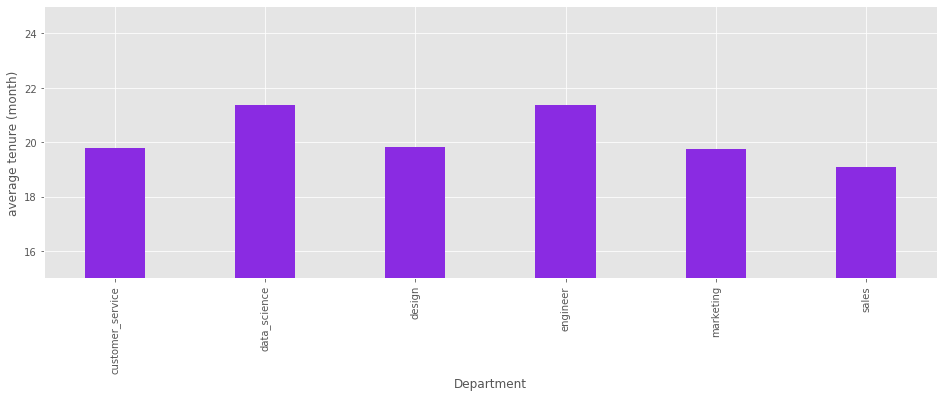

In [41]:
df1= pd.DataFrame({ 'mean_tenure':df[(df['current_employee']==0)].groupby(['dept']).tenure_months.mean()}).reset_index()
fig = plt.subplots(figsize = (16,5))
plt.bar(df1.dept, df1.mean_tenure, color='blueviolet',width=0.4)
plt.xlabel('Department')
plt.ylabel('average tenure (month)')
plt.xticks(rotation =90)
plt.ylim(15,25)
plt.show()

<b> It seems that people in sales have the shortest average tenure and people in data science and engineering tend to stay longer, this may be due to the fact that people in data science and engineering are more likely to get stock options in their offers and they have to wait for them to be vested.

## Tenure vs Company

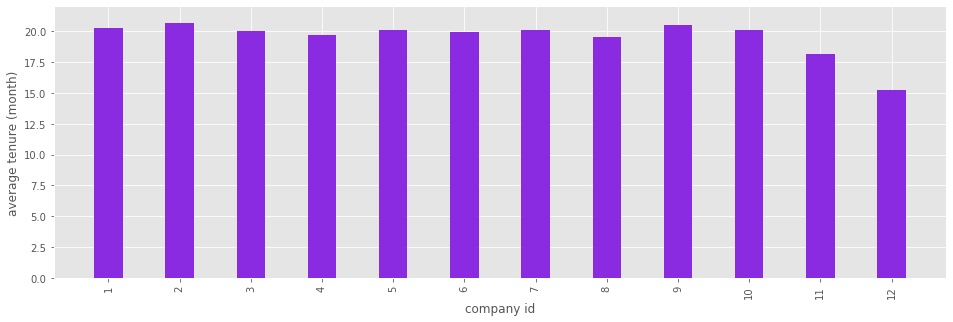

In [42]:
df1= pd.DataFrame({ 'mean_tenure':df[(df['current_employee']==0)].groupby(['company_id']).tenure_months.mean()}).reset_index()
fig = plt.subplots(figsize = (16,5))
plt.bar(df1.company_id, df1.mean_tenure, color='blueviolet',width=0.4)
plt.xlabel('company id')
plt.ylabel('average tenure (month)')
plt.xticks(range(1,13),rotation =90)
plt.ylim(0,22)
plt.show()

<b> ex employees of 2 and 9 have a higher average tenure, and ex employees of 4 and 8 have the shortest tenure. 

## Salary vs  Seniority and Department

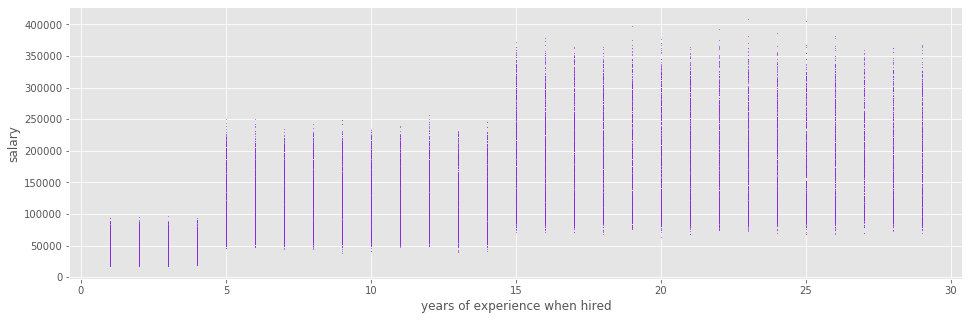

In [43]:
fig = plt.subplots(figsize = (16,5))
plt.scatter(df.seniority,df.salary, marker='.', s=0.5, color = 'blueviolet')
plt.xlabel('years of experience when hired')
plt.ylabel('salary')
plt.show()

<b> salaries are clearly related to the seniority level. There are 3 levels of seniority, junior with work experience less than 5 years, mid senior level with work experience between 5 and 14 years and senior level with work experience of 15 years or more.  

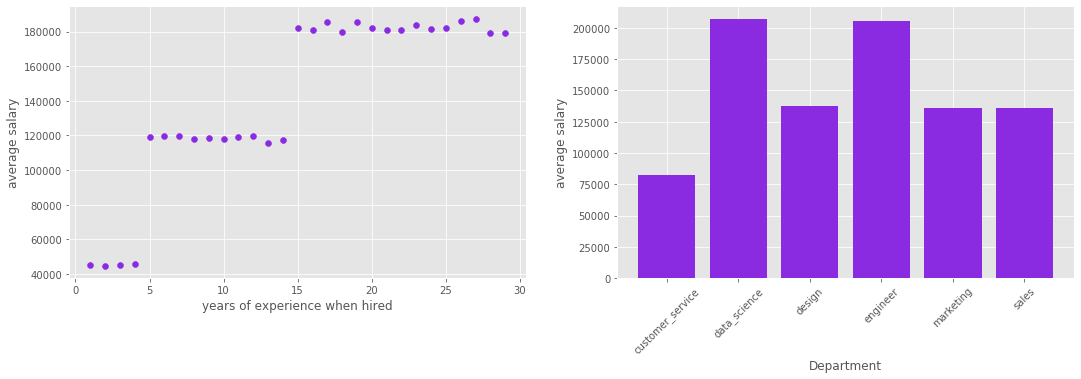

In [44]:
fig, axs = plt.subplots(1,2,figsize=(18,5))
df1 = pd.DataFrame({'mean_salary': df.groupby('seniority').salary.mean()}).reset_index()
axs[0].scatter(df1.seniority,df1.mean_salary, color = 'blueviolet')
axs[0].set_xlabel('years of experience when hired')
axs[0].set_ylabel('average salary')


df1 = pd.DataFrame({'mean_salary': df.groupby('dept').salary.mean()}).reset_index()
axs[1].bar(df1.dept,df1.mean_salary, color = 'blueviolet')
axs[1].set_xlabel('Department')
axs[1].set_ylabel('average salary')
axs[1].tick_params('x',labelrotation=45)


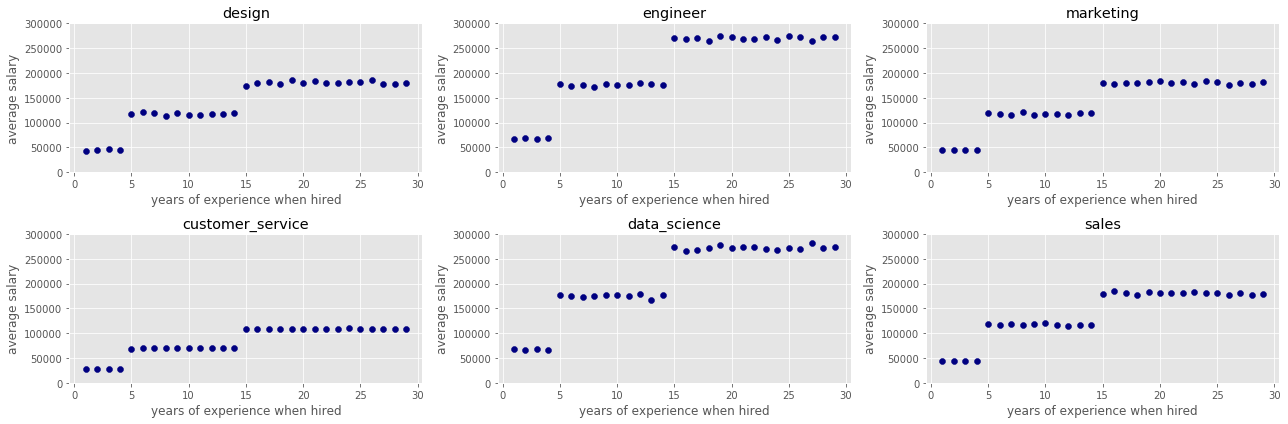

In [45]:
fig, axs = plt.subplots(2,3,figsize=(18,6))
for i in range(len(deptlist)):
    df1 = pd.DataFrame({'mean_salary': df[df['dept']==deptlist[i]].groupby('seniority').salary.mean()}).reset_index()
    r = int(i/3)
    c = i%3
    axs[r, c].scatter(df1.seniority,df1.mean_salary, color='navy')
    axs[r, c].set_xlabel('years of experience when hired')
    axs[r, c].set_ylabel('average salary')
    axs[r, c].set_title(deptlist[i])
    axs[r, c].set_ylim(0,300000)
fig.tight_layout()

<b>There's huge difference between salaries in different departments, highest salaries are in engineering and data science department, average salary for senior employees in marketing, sales and design is almost equal to average salary for mid senior employees of data science and engineering, worst pays belong to customer service where the average salary for senior employees is less than the average salary of mid-senior employees in other departments. 

### Salary vs Department and Company

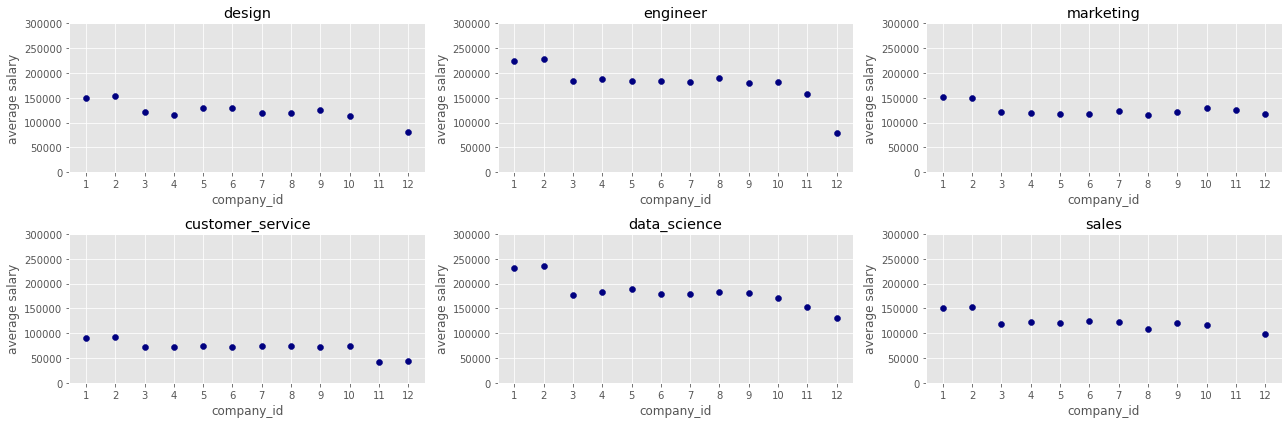

In [46]:
fig, axs = plt.subplots(2,3,figsize=(18,6))
for i in range(len(deptlist)):
    df1 = pd.DataFrame({'mean_salary': df[df['dept']==deptlist[i]].groupby('company_id').salary.mean()}).reset_index()
    r = int(i/3)
    c = i%3
    axs[r, c].scatter(df1.company_id,df1.mean_salary, color='navy')
    axs[r, c].set_xlabel('company_id')
    axs[r, c].set_ylabel('average salary')
    axs[r, c].set_title(deptlist[i])
    axs[r, c].set_ylim(0,300000)
    axs[r, c].set_xticks(range(1,13))
fig.tight_layout()

## Salary vs Join Date

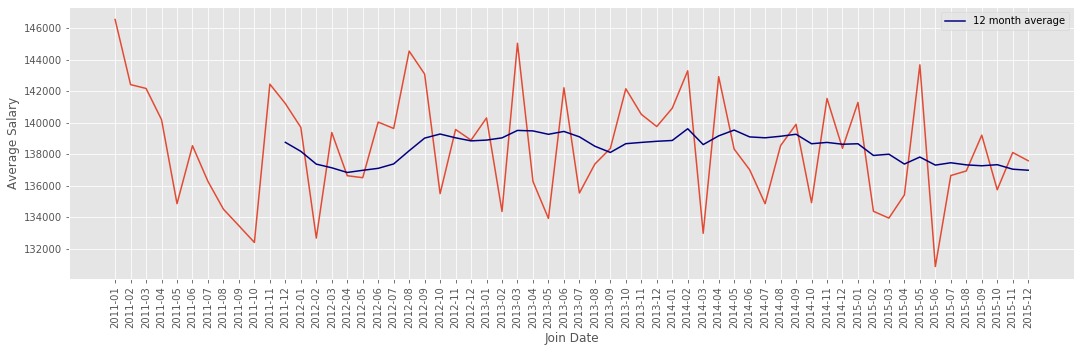

In [47]:
date = []
for i in range(2011,2016):
    for j in range(1,13):
        if j<10:s= str(i)+ '-0'+ str(j)
        else:s= str(i)+ '-'+ str(j)            
        date.append(s)
        
df1= pd.DataFrame({ 'mean_salary':df.groupby('join').salary.mean()}).reset_index()
y = df1['mean_salary'].tolist()
rolling_mean = df1.mean_salary.rolling(window=12).mean()
       
fig=plt.subplots(figsize=(18,5))
plt.plot(date,y)
plt.xticks(rotation=90)
plt.plot( rolling_mean, label='12 month average', color='navy')
plt.ylabel('Average Salary')
plt.xlabel('Join Date')
plt.legend()
plt.show()
    


In [48]:
print ('\033[1m'+'Average salary of ex employees: ',int(df[df['current_employee']==0].salary.mean()), '$')
print ('\033[1m'+'Average salary of current employees: ',int(df[df['current_employee']==1].salary.mean()), '$')

Average salary of ex employees:  135713 $
Average salary of current employees:  141192 $


<b> New hires, have the same salaries as old hires.
    
Average salary of current employees is 4% higher than the average salary of ex employees

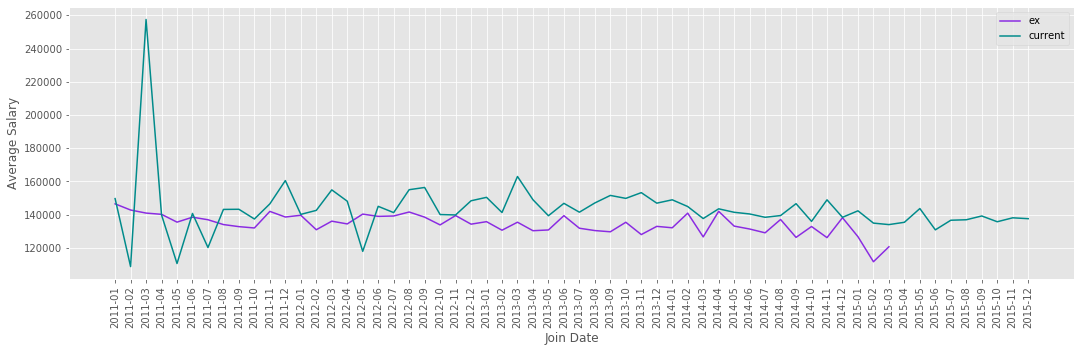

In [49]:
df1= pd.DataFrame({ 'current_mean_salary':df[df['current_employee']==1].groupby('join').salary.mean()})
df1['ex_mean_salary'] = df[df['current_employee']==0].groupby('join').salary.mean()
       
fig=plt.subplots(figsize=(18,5))
plt.plot(date,df1.ex_mean_salary, color='blueviolet',label='ex')
plt.plot(date,df1.current_mean_salary, color='darkcyan',label='current')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
plt.xlabel('Join Date')
plt.legend()

plt.show()

<b> Plot shows that for people who joined the company at the same time, the average salary of people who quit is less than the average salary of the people who stayed.

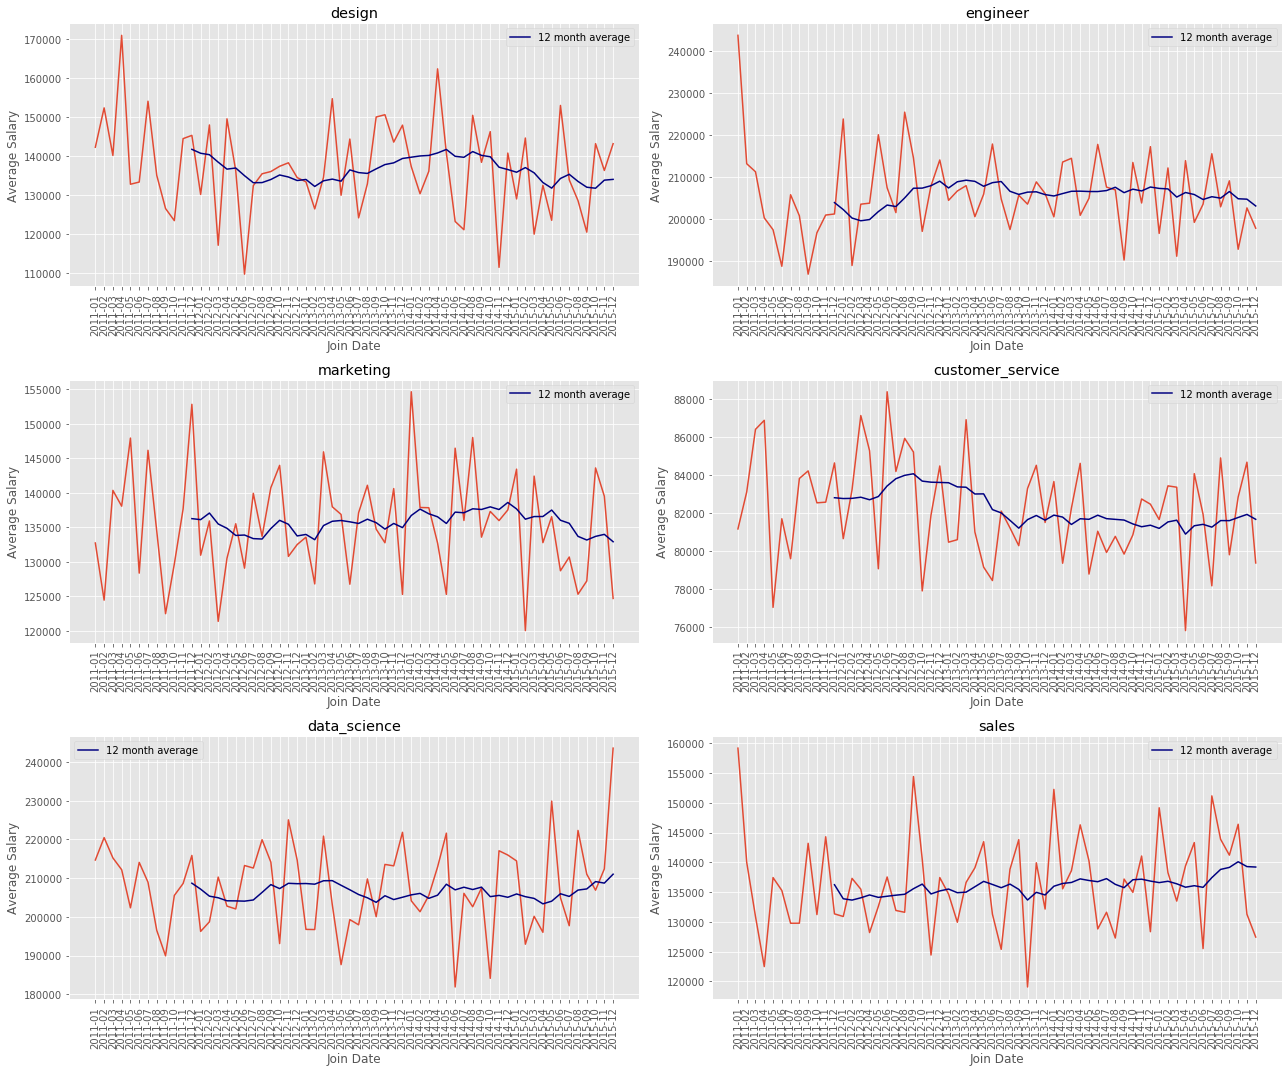

In [50]:
df1= pd.DataFrame({ 'mean_salary':df.groupby(['join','dept']).salary.mean()}).reset_index()

fig, axs= plt.subplots(3,2,figsize=(18,15))
for i in range(len(deptlist)):
    r = int(i/2)
    c = i%2
    y = df1[df1['dept']==deptlist[i]].mean_salary.tolist()
    rolling_mean = df1[df1['dept']==deptlist[i]].mean_salary.rolling(window=12).mean()
    
    axs[r,c].plot(date,y)
    axs[r,c].plot(date,rolling_mean, label='12 month average', color='navy')
    axs[r,c].set_ylabel('Average Salary')
    axs[r,c].set_xlabel('Join Date')
    axs[r,c].set_title(deptlist[i])
    axs[r,c].tick_params('x',rotation=90)
    axs[r,c].legend()
    

fig.tight_layout()

## Salary vs Company

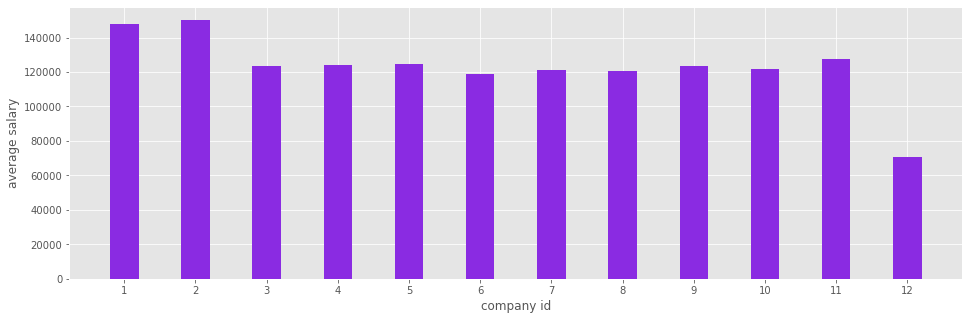

In [51]:
df1= pd.DataFrame({ 'mean_salary':df[(df['current_employee']==0)].groupby(['company_id']).salary.mean()}).reset_index()
fig = plt.subplots(figsize = (16,5))
plt.bar(df1.company_id, df1.mean_salary, color='blueviolet',width=0.4)
plt.xlabel('company id')
plt.ylabel('average salary')
plt.xticks(range(1,13))
plt.show()

<b> company 1 and company 2 are the highest paying companies.

## Seniority vs Join Date

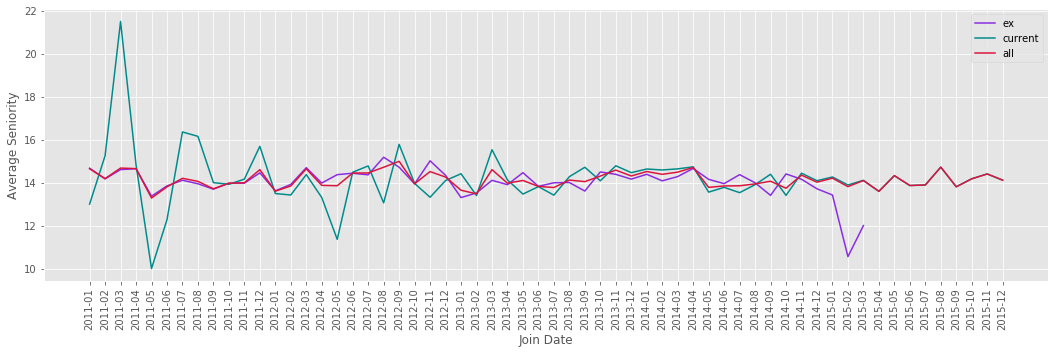

In [52]:
df1= pd.DataFrame({ 'current_mean_seniority':df[df['current_employee']==1].groupby('join').seniority.mean()})
df1['ex_mean_seniority'] = df[df['current_employee']==0].groupby('join').seniority.mean()
df1['mean_seniority'] = df.groupby('join').seniority.mean()
       
fig=plt.subplots(figsize=(18,5))
plt.plot(date,df1.ex_mean_seniority, color='blueviolet',label='ex')
plt.plot(date,df1.current_mean_seniority, color='darkcyan',label='current')
plt.plot(date,df1.mean_seniority, color='crimson',label='all')
plt.xticks(rotation=90)
plt.ylabel('Average Seniority')
plt.xlabel('Join Date')
plt.legend()

plt.show()

## Seniority vs Company

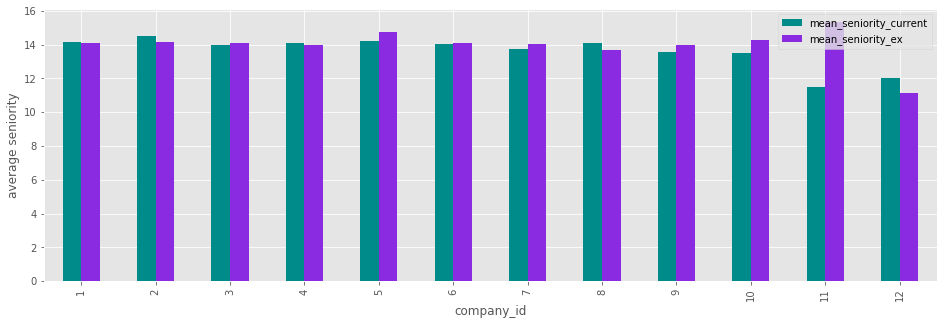

In [53]:
df1= pd.DataFrame({ 'mean_seniority':df.groupby(['company_id']).seniority.mean(), 
                    'mean_seniority_current':df[df['current_employee']==1].groupby(['company_id']).seniority.mean(),
                    'mean_seniority_ex':df[df['current_employee']==0].groupby(['company_id']).seniority.mean()})
df1[['mean_seniority_current','mean_seniority_ex']]\
.plot.bar(figsize = (16,5),color={'mean_seniority_current': "darkcyan", "mean_seniority_ex": "blueviolet"});
plt.ylabel('average seniority');


## Seniority VS Department

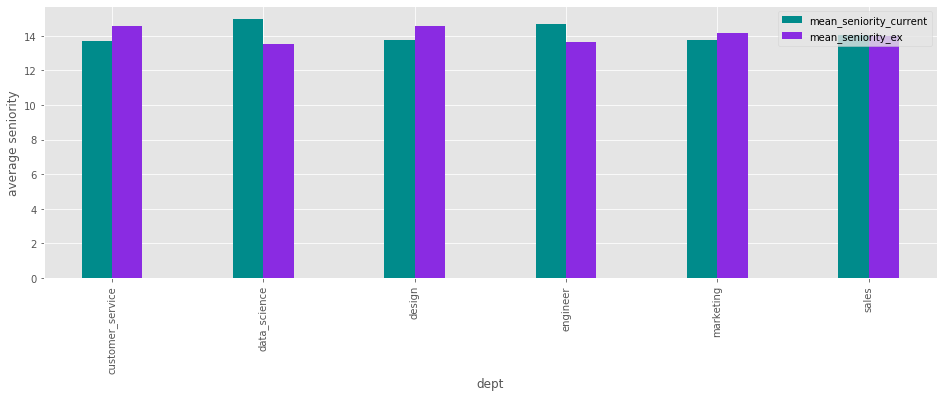

In [54]:
df1= pd.DataFrame({ 'mean_seniority':df.groupby(['dept']).seniority.mean(), 
                    'mean_seniority_current':df[df['current_employee']==1].groupby(['dept']).seniority.mean(),
                    'mean_seniority_ex':df[df['current_employee']==0].groupby(['dept']).seniority.mean()})

df1[['mean_seniority_current','mean_seniority_ex']]\
.plot.bar(figsize = (16,5),color={'mean_seniority_current': "darkcyan", "mean_seniority_ex": "blueviolet"},width=0.4);
plt.ylabel('average seniority');

## Join Date and Tenure

In [55]:
df1 = pd.DataFrame({'employee_count': df.groupby([df.join_date.map(lambda x: x.year),'current_employee']).employee_id.count()}).reset_index()

dict1={}
for i in range(2011,2016):
    a=df1[(df1['join_date']==i) & (df1['current_employee']==0) ].employee_count.values.tolist()[0]
    b=df1[(df1['join_date']==i) & (df1['current_employee']==1) ].employee_count.values.tolist()[0]
    dict1[i]= b/(a+b)
print('\033[1m'+'percent of employees hired in each year who are still working for the company  as of December 2015:\n')    
print("\n".join("{}\t{}%".format(k, round(v*100,2)) for k, v in dict1.items()))


percent of employees hired in each year who are still working for the company  as of December 2015:

2011	4.87%
2012	20.95%
2013	39.23%
2014	63.61%
2015	99.19%


In [56]:
df1 = pd.DataFrame({'employee_count': df.groupby([df.join_date.map(lambda x: x.year),'dept','current_employee']).employee_id.count()}).reset_index()

currently_employed = []
dept = []
join_year = []
for i in range(2011,2016):
    for j in ['design', 'engineer', 'marketing', 'customer_service', 'data_science', 'sales']:
        a=df1[(df1['join_date']==i) & (df1['dept']==j) & (df1['current_employee']==0) ].employee_count.values.tolist()[0]
        b=df1[(df1['join_date']==i) & (df1['dept']==j) & (df1['current_employee']==1) ].employee_count.values.tolist()[0]
        currently_employed .append(100*b/(a+b))
        join_year.append(i)
        dept.append(j)

df1=pd.DataFrame({'join_year':join_year,
                  'dept':dept,
                  'currently_employed':currently_employed})


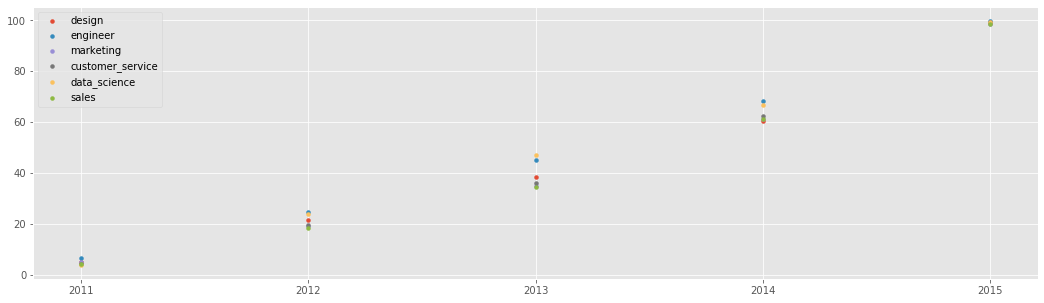

In [57]:
depts = list(df1['dept'].unique())
       
fig=plt.subplots(figsize=(18,5))
for i in range(0 , len(depts)):
    data = df1.loc[df1['dept'] == depts[i]]
    plt.scatter('join_year', 'currently_employed', data=data, label=depts[i], s=15)
plt.xticks(range(2011,2016))    
plt.legend()
plt.show()

## Predicting employee's tenure with company and identifying importnat features 

In [58]:
# dropping irrelevant features
df1= df_ex.drop(['employee_id', 'join_date', 'quit_date','current_employee','last_date','join'],axis=1)

In [59]:
#getting hot-one vectores for categorical variables

df1['company_id'] = df1['company_id'].apply(lambda x: str(x))
df1 = pd.get_dummies(df1,drop_first = True)

# difining 4 classes of employees (- those who leave before 16 months
#                                  - those who leave before 28 months
#                                  - those who leave before 40 months
#                                  - those who stay longer)
def classlabel(x):

    if x < 16:
        return 0
    elif x < 28:
        return 1
    elif x < 40:
        return 2
    else:
        return 3


    
df1['tenure_class'] = df1['tenure_months'].apply(lambda x : classlabel(x))
df1 = df1.drop('tenure_months' , axis=1)

# adding polynomial features

df1['salary_2'] = df1['salary'].apply(lambda x : x**2)
df1['salary_3'] = df1['salary'].apply(lambda x : x**3)
df1['seniority_2'] = df1['seniority'].apply(lambda x : x**2)
df1['seniority_3'] = df1['seniority'].apply(lambda x : x**3)

df1['salary/seniority'] = df1['salary']/df1['seniority']
df1['salary*seniority'] = df1['salary']*df1['seniority']




df1.head()

,seniority,salary,company_id_10,company_id_11,company_id_12,company_id_2,company_id_3,company_id_4,company_id_5,company_id_6,...,dept_engineer,dept_marketing,dept_sales,tenure_class,salary_2,salary_3,seniority_2,seniority_3,salary/seniority,salary*seniority
1,21,191000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.648100e+10,6.967871e+15,441,9261,9095.238095,4011000.0
2,9,90000.0,0,0,0,0,1,0,0,0,...,0,0,0,2,8.100000e+09,7.290000e+14,81,729,10000.000000,810000.0
3,20,298000.0,0,0,0,1,0,0,0,0,...,1,0,0,1,8.880400e+10,2.646359e+16,400,8000,14900.000000,5960000.0
6,18,119000.0,0,0,0,0,1,0,0,0,...,0,0,0,1,1.416100e+10,1.685159e+15,324,5832,6611.111111,2142000.0
7,7,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.960000e+10,2.744000e+15,49,343,20000.000000,980000.0


In [60]:
train_data,test_data = train_test_split(df1,train_size=0.9,random_state=2020)

In [61]:
y = train_data['tenure_class']
x = train_data.drop('tenure_class', axis = 1)

y_test = test_data['tenure_class']
x_test = test_data.drop('tenure_class', axis = 1)

#Min-Max Scaling for Features in Training Dataset
min_col = []
range_col = []
col = ['salary','seniority','salary_2','salary_3','seniority_2','seniority_3','salary/seniority','salary*seniority']

for i in range(len(col)):
    m = x[col[i]].min()
    min_col.append(m)
    r = x[col[i]].max()- x[col[i]].min()
    range_col.append(r)   
    x[col[i]] = x[col[i]].apply(lambda x : (x - m)*1.0/r  )

#Min-Max Scaling for Features in Test Dataset
for i in range(len(col)):
    m = min_col[i]
    r = range_col[i]
    x_test[col[i]] = x_test[col[i]].apply(lambda x : (x - m)*1.0/r  )

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf1 = RandomForestClassifier(n_estimators=1000,max_depth=10, random_state=0)
clf1.fit(x, y)

pred_train = clf1.predict(x)
print('\033[1m'+'Accuracy on train set',accuracy_score(y,pred_train))

pred_test = clf1.predict(x_test)
print('\033[1m'+'Accuracy on test set',accuracy_score(y_test,pred_test))

Accuracy on train set 0.5652462829138633
Accuracy on test set 0.5291479820627802


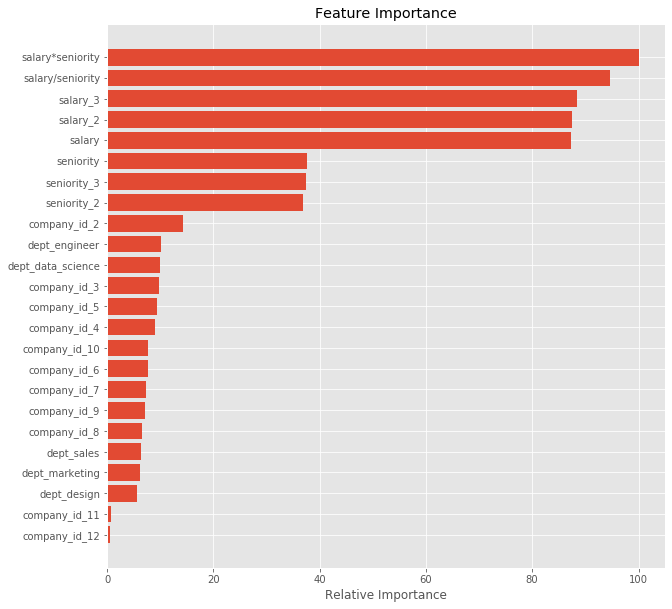

In [63]:
# Plot feature importance
feature_importance = clf1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

## SVC

In [64]:
from sklearn.svm import SVC

# Support Vector Machine with rbf kernel
clf2 = SVC(kernel = 'rbf', random_state = 0)
clf2.fit(x,y)

#predicting tenure for the test dataset
pred_train = clf2.predict(x)
print('\033[1m'+'Accuracy on train set',accuracy_score(y,pred_train))

pred_test = clf2.predict(x_test)
print('\033[1m'+'Accuracy on test set',accuracy_score(y_test,pred_test))

Accuracy on train set 0.5429022344048509
Accuracy on test set 0.5291479820627802


In [65]:
print('Frequency of labels in train set:')
y.value_counts()

Frequency of labels in train set:


0    6536
1    3088
2    1514
3     901
Name: tenure_class, dtype: int64

In [66]:
unique, counts = np.unique(pred_train, return_counts=True)
print('Frequency of the predicted labels for train set:')
print (np.asarray((unique, counts)).T)

Frequency of the predicted labels for train set:
[[    0 12039]]


In [67]:
print('Frequency of labels in test set:')
y_test.value_counts()

Frequency of labels in test set:


0    708
1    350
2    168
3    112
Name: tenure_class, dtype: int64

In [68]:
unique, counts = np.unique(pred_test, return_counts=True)
print('Frequency of the predicted labels:')
print(np.asarray((unique, counts)).T)

Frequency of the predicted labels:
[[   0 1338]]


looking at the distribution of predicted labels, it is obvious that the classifier predicts that employees will leave the company within 15 months for almost all examples and since half of the employees actually leave within 15 months we have about 50 percent accuracy, but that does not mean anything since the classifier did not learn anything from data.